Statistical Inference - Analyzing Simulated Particle Physics Data

*Statistical inference: the process of using a limited sample of data to draw conclusions about a larger, unseen population.*

Here we will use thousands of "events" to infer the properties of a particle. 

The methods in this exercise are crucial for any role involving data analysis, such as fundamental research, finance, business and beyond. There are 4 conceptual questions included here and they are examples of what you may be asked in an interview for such a role. Answer the question in the **same** markdown cell as the question is in

**One** of the conceptual questions will be chosen at random and **this one** question will be marked for all submissions. It will be worth 3 marks. Therefore to ensure you have access to these 3 marks you need to answer all the conceptual questions!

You will perform a simplified particle physics analysis. You will:
* Generate binned simulated data from real-world parameters for a signal (a "particle") on top of a background
* Fit a model to this data
* Evaluate the "goodness-of-fit" and "p-value" of the model 
* Perform a "pull study" to check if your fit is `unbiased`

All the formulae you need to do this are provided below, however it is recommended that you also read about "p-values" and "pull studies" as they are essential statistical analysis tools.

**IMPORTANT : Read all the code comments (lines starting with #), they provide requirements that your code must follow to pass the tests!!!**

Data generation complete.


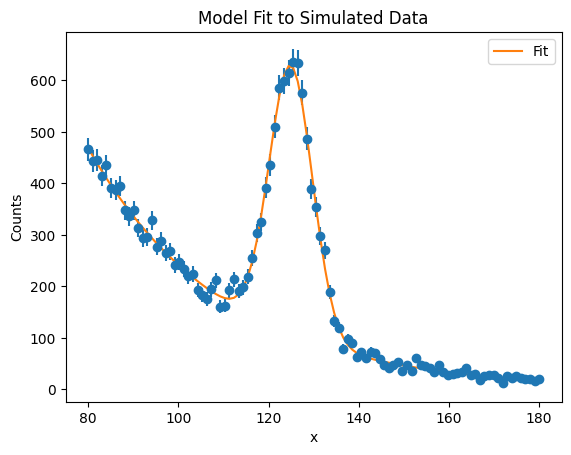

Fit complete with p-value: 0.112
Correlation matrix:
[[ 1.          0.16108804 -0.07686717  0.35331685 -0.25811652]
 [ 0.16108804  1.          0.05042248  0.13296399 -0.94984017]
 [-0.07686717  0.05042248  1.         -0.1099704  -0.03125516]
 [ 0.35331685  0.13296399 -0.1099704   1.         -0.21643603]
 [-0.25811652 -0.94984017 -0.03125516 -0.21643603  1.        ]]
1000 toy experiments successfully fitted.


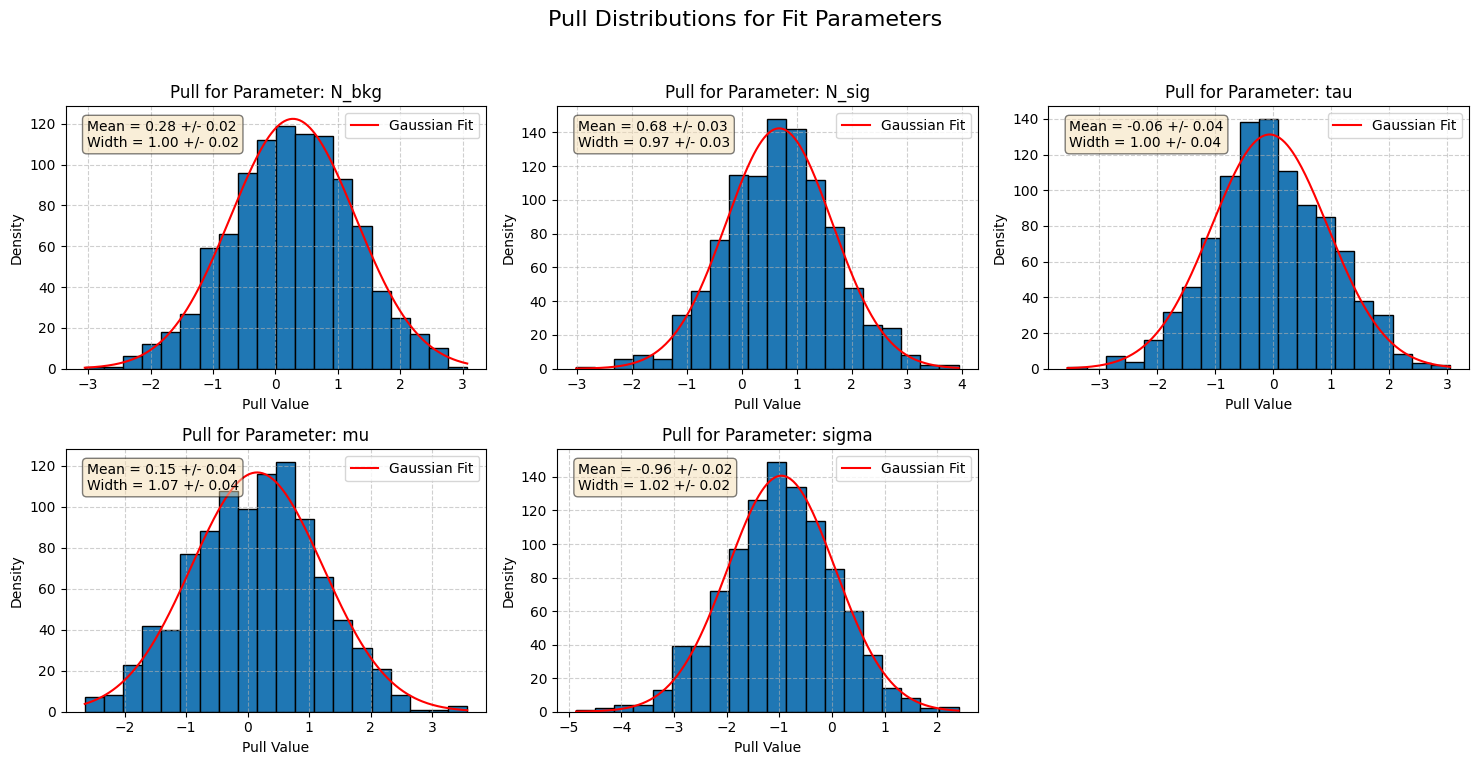

In [1]:
## DO NOT CHANGE THE CODE IN THIS CELL!! ##
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2, multivariate_normal

def pdf_exp(x, tau):
    """
    args:
        x: x-axis values
        tau: decay constant (related to the background yield)
    returns:
        Exponential function for background modeling. PDF integrates to 1 over the range of x.
    """
    return (1 / tau) * np.exp(-x / tau)

def pdf_gaus(x, mu, sigma):
    """
    args:
        x: x-axis values
        mu: mean (peak position) of the Gaussian signal
        sigma: standard deviation (width) of the Gaussian signal
    returns:
        Gaussian function for signal modeling. PDF integrates to 1 over the range of x.
    """
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def model_total(x, N_sig, N_bkg, mu, sigma, tau):
    """
    args:
        x: x-axis values
        N_sig: number of signal events
        N_bkg: number of background events
        mu: mean of the Gaussian signal
        sigma: standard deviation of the Gaussian signal
        tau: decay constant for the background
    returns:
        Total model combining signal and background contributions.
    """
    return N_sig * pdf_gaus(x, mu, sigma) + N_bkg * pdf_exp(x, tau)

    # --- True, real-world parameters ---
N_sig_true = 6500         # A relatively small signal
N_bkg_true = 200000       # A large background
mu_true = 125.0           # Particle Mass
sigma_true = 5.0          # Particle Width
tau_true = 30.0           # Background decay constant
true_params = [N_sig_true, N_bkg_true, mu_true, sigma_true, tau_true]

# Define the x-axis for our data (mass range around the particle mass). We will generate binned data.
x_data = np.linspace(80, 180, 100)
bin_width = x_data[1] - x_data[0]

y_true_total = y_observed = y_errors = np.zeros_like(x_data)

## DO NOT CHANGE THE CODE ABOVE THIS LINE!! ##

##################################################################
#### Complete the code below to generate the "observed" data. ####
##################################################################

# 1. Calculate the expected number of events in each bin, `y_true_total`, from the true parameters. Remember to multiply by the bin width!

# YOUR CODE HERE
y_true_total = model_total(x_data, *true_params) * bin_width

    
# 2. Simulate the random nature of a counting experiment using Poisson statistics, creating `y_observed`.

# YOUR CODE HERE
y_observed = np.random.poisson(y_true_total)


# 3. Calculate the uncertainty for each data point, `y_errors`.

# YOUR CODE HERE
y_errors = np.sqrt(y_observed)


## DO NOT CHANGE THE CODE BELOW THIS LINE!! ##

# Handle cases where a bin has 0 counts to avoid division-by-zero errors later.
y_errors[y_errors == 0] = 1.0

print("Data generation complete.")

##################################################################
#### Complete the code below to fit the data. ####################
##################################################################

# Provide initial guesses for the fitter. Using the "true" values is a good start.
initial_guesses = [N_sig_true, N_bkg_true, mu_true, sigma_true, tau_true]

# 1. Perform the fit saving the results as `popt` and `pcov`. 
# Make sure to pass the data errors using the `sigma` argument so it performs a proper chi-squared fit and use `absolute_sigma=True`.

popt = pcov = None

## DO NOT CHANGE THE CODE ABOVE THIS LINE!! ##

# YOUR CODE HERE
popt, pcov = curve_fit(model_total, x_data, y_observed, p0 = initial_guesses, sigma=y_errors,absolute_sigma=True)

# 2. Write the formula to calculate the chi-squared value `chi2_value`.
#    Formula: chi2 is the sum of [ (observed - expected)^2 / error^2 ]

chi2_value = None

# YOUR CODE HERE
chi2_value = np.sum((y_observed - model_total(x_data, *popt) * bin_width)**2 / y_errors**2)


# 3. Calculate the degrees of freedom, `dof` and the p-value `p_value`.
#    Formula: dof is the number of data points - number of fitted parameters.
#    Formula: p_value is (1 - chi2.cdf(chi2_value, dof))

p_value= None

# YOUR CODE HERE
dof = len(x_data) - len(popt)

p_value = (1-chi2.cdf(chi2_value,dof))

# 4. Plot the fit curve on top of the data points with error bars.

# YOUR CODE HERE
plt.errorbar(x_data, y_observed, y_errors, fmt='o')
plt.plot(x_data, model_total(x_data, *popt), label="Fit")
plt.title("Model Fit to Simulated Data")
plt.legend()
plt.xlabel("x")
plt.ylabel("Counts")
plt.show()



## DO NOT CHANGE THE CODE BELOW THIS LINE!! ##

# 5. Print the covariance matrix for the fitted parameters.
perr = np.sqrt(np.diag(pcov))
correlation_matrix = pcov / np.outer(perr, perr)

print(f"Fit complete with p-value: {p_value:.3f}")
print(f"Correlation matrix:\n{correlation_matrix}")

##################################################################################################################
#### Complete the code to generate a large number of toys and calculate the pulls for each fitted parameter. #####
##################################################################################################################

# 1. Use the `multivariate_normal.rvs` method to sample the parameter values using the fitted parameters and their covariance. Make 1000 toy samples. Remember to add statistical fluctuations to the data. 
# For each toy, fit the model (remember to pass the data errors to the `sigma` argument) and calculate the pull for each fitted parameter.
#    Formula: (Fitted Value - True Value) / Fitted Error
# Consider how to handle failed fits with a `try-except` block.

num_toys = 1000
toy_truth_dist = multivariate_normal(mean=popt, cov=pcov, allow_singular=True)

pulls = {'N_bkg': [], 'N_sig': [], 'tau': [], 'mu': [], 'sigma': []}
param_keys = list(pulls.keys())

while len(pulls['N_bkg']) < num_toys:
    ## DO NOT CHANGE THE CODE ABOVE THIS LINE!! ##
    
    # YOUR CODE HERE
    toy_params = toy_truth_dist.rvs()  
    y_true_toy = model_total(x_data, *toy_params) * bin_width

    y_obs_toy = np.random.poisson(y_true_toy)
    y_err_toy = np.sqrt(y_obs_toy)
    y_err_toy[y_err_toy == 0] = 1.0

    try:
        popt_toy, pcov_toy = curve_fit(
            lambda x, N_sig, N_bkg, mu, sigma, tau: model_total(x, N_sig, N_bkg, mu, sigma, tau) * bin_width,
            x_data,
            y_obs_toy,
            p0=toy_params,
            sigma=y_err_toy,
            absolute_sigma=True,
            maxfev=10000
        )
    except Exception:
        continue

    perr_toy = np.sqrt(np.diag(pcov_toy))

    for i, key in enumerate(param_keys):
        pull_value = (popt_toy[i] - toy_params[i]) / perr_toy[i]
        pulls[key].append(pull_value)


## DO NOT CHANGE THE CODE BELOW THIS LINE!! ##
print(f"{len(pulls['N_bkg'])} toy experiments successfully fitted.")


#############################################################################################################################
#### Complete the code to determine the mean and width of the pull distributions and plot the pulls for each parameter. #####
#############################################################################################################################

fig2, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Create histograms for each parameter's pull distribution
for i, key in enumerate(param_keys):
    ax = axes[i]
    p = pulls[key]

    # Create the histogram
    counts, bin_edges = np.histogram(p, bins=20)
    ax.bar(
    bin_edges[:-1],          # Left edge of each bar
    counts,                  # Height of each bar
    width=np.diff(bin_edges),# Width of each bar
    align='edge',            # Align bars by their left edge
    edgecolor='black'
)
    ## DO NOT CHANGE THE CODE ABOVE THIS LINE!! ##
    
    # 1. Fit a Gaussian to the binned pull distribution above with best-fit parameters `pars` and covariance `cov` and plot it on top of the histogram.
    # YOUR CODE HERE
    def gaus(x, A, mu, sigma):
        return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

    bincenters = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    try:
        pars, cov = curve_fit(gaus, bincenters, counts, p0=[max(counts), 0, 1])
    except:
        continue

    xfit = np.linspace(bin_edges[0], bin_edges[-1], 300)
    ax.plot(xfit, gaus(xfit, *pars), 'r-', label="Gaussian Fit")



    ## DO NOT CHANGE THE CODE BELOW THIS LINE!! ##
    
    ax.set_title(f'Pull for Parameter: {key}')
    ax.set_xlabel('Pull Value')
    ax.set_ylabel('Density')
    ax.grid(True, linestyle='--', alpha=0.6)

    # Display the results of the Gaussian fit on the plot
    text_str = f'Mean = {pars[1]:.2f} +/- {np.sqrt(cov[1,1]):.2f}\nWidth = {pars[2]:.2f} +/- {np.sqrt(cov[2,2]):.2f}'
    ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax.legend()

fig2.suptitle('Pull Distributions for Fit Parameters', fontsize=16)
fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
axes[5].axis('off')
plt.show()